1. Task 소개 (배경, 목적 등)

##### 배경
- 대규모 다국적 기업(MNC)은 직원 승진을 결정할 때 다양한 요인을 고려해야 한다. 현재의 승진 프로세스는 추천과 과거 성과를 바탕으로 직원들을 선정하고, 각 수직 부문에서 필요한 기술에 따라 별도의 교육 및 평가 프로그램을 진행하는 방식이다. 프로그램 종료 후에는 교육 성과, KPI 완료율 등의 다양한 요소를 기반으로 승진 여부가 결정된다. 그러나 이 프로세스는 최종 승진 발표까지 시간이 걸려 새로운 역할로의 전환이 지연되는 문제가 있다.

##### 소개
- 여기서 제공된 데이터는 직원들의 과거 및 현재 성과 및 여러 가지 특성 등을 포함하고 있으며, 이를 활용하여 특정 체크포인트에서 승진할 후보자를 예측하는 모델을 개발해야 한다. 평가 지표로는 F1 점수를 사용한다.


##### 목적
- 따라서, 이 과제의 목적은 머신 러닝을 활용하여 승진 가능성이 높은 직원을 사전에 예측하는 것이다. 이를 통해 회사는 승진 사이클을 가속화하고, 적시에 적합한 인재를 새로운 역할로 준비시킬 수 있다. 제공된 데이터셋을 활용하여 특정 체크포인트에서 승진 가능성을 예측하고, 이를 바탕으로 최종 승진을 결정하기 위한 모델을 개발해야 한다.

In [1]:
import pandas as pd
import numpy as np

In [2]:
train_data = pd.read_csv("C:/Users/windows/Desktop/데이터사이언스 기말 과제/train_LZdllcl.csv")
test_data = pd.read_csv('C:/Users/windows/Desktop/데이터사이언스 기말 과제/test_2umaH9m.csv')

In [3]:
train_data

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


In [4]:
train_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [6]:
train_data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [7]:
test_data

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70


In [8]:
# getting their shapes
print("Shape of train :", train_data.shape)
print("Shape of test :", test_data.shape)

Shape of train : (54808, 14)
Shape of test : (23490, 13)


##### 데이터 탐색

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

- (1) Employee_id: 각 직원에게는 고유한 ID가 제공됨. 데이터셋에서 직원 수를 확인할 수 있음

In [10]:
train_data.employee_id.value_counts()

employee_id
65438    1
16223    1
38250    1
68086    1
78080    1
        ..
38645    1
76563    1
46788    1
75029    1
51526    1
Name: count, Length: 54808, dtype: int64

In [11]:
# Employee_id
# 이 변수는 결과 변수인 is_promoted에 영향을 미치지 않으므로 분석에서 제외
train_data.employee_id.value_counts()

employee_id
65438    1
16223    1
38250    1
68086    1
78080    1
        ..
38645    1
76563    1
46788    1
75029    1
51526    1
Name: count, Length: 54808, dtype: int64

##### 범주형 변수:
- department
- region
- education
- gender
- recruitment_channel
##### 연속형 변수:
- employee_id
- age
- avg_training_score

- (2) Department: 9개의 다른 범주를 가진 범주형 변수. Sales & Marketing 부서가 가장 많은 직원을 보유하고 Operations 부서가 그 뒤를 이음.

In [12]:
train_data.department.value_counts()

department
Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: count, dtype: int64

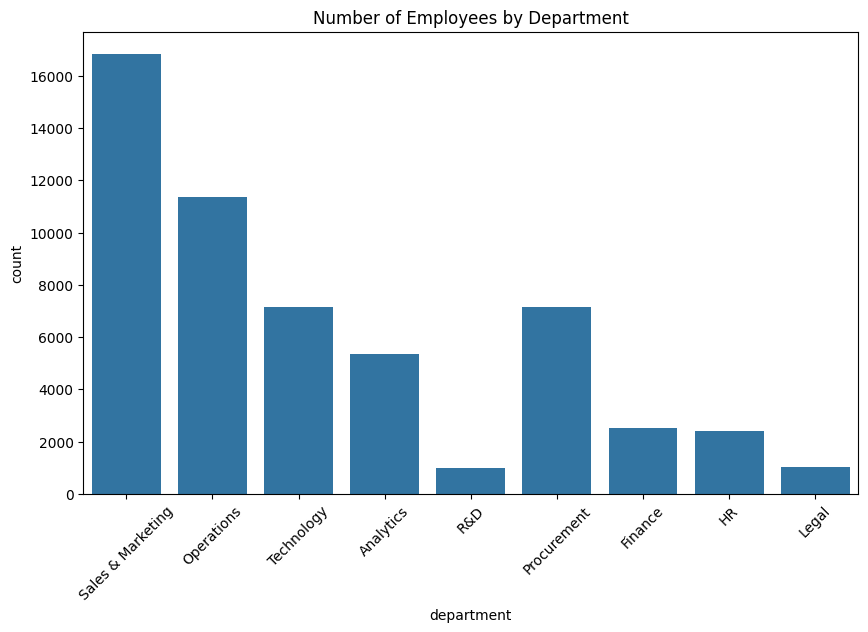

In [13]:
# 각 부서별 직원 수 시각화
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='department')
plt.title('Number of Employees by Department')
plt.xticks(rotation=45)
plt.show()

- (3) region
직원들이 근무하는 다양한 지역을 포함하고 있으며, 이 지역들은 순서가 없는 형식

In [15]:
train_data.region.value_counts()

region
region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: count, dtype: int64

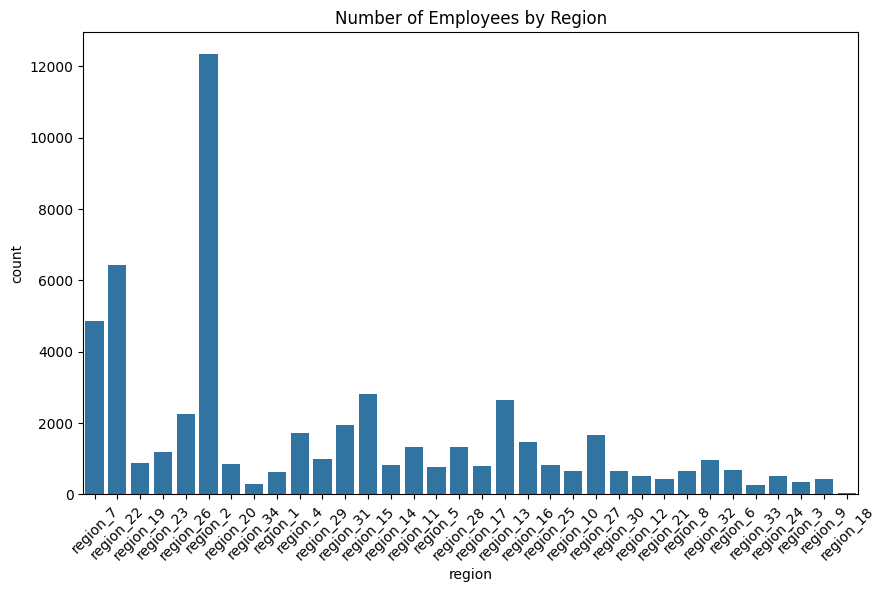

In [16]:
# 각 지역별 직원 수
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='region')
plt.title('Number of Employees by Region')
plt.xticks(rotation=45)
plt.show()

- (4) Education: 직원의 교육 수준

In [17]:
train_data.education.value_counts()

education
Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: count, dtype: int64

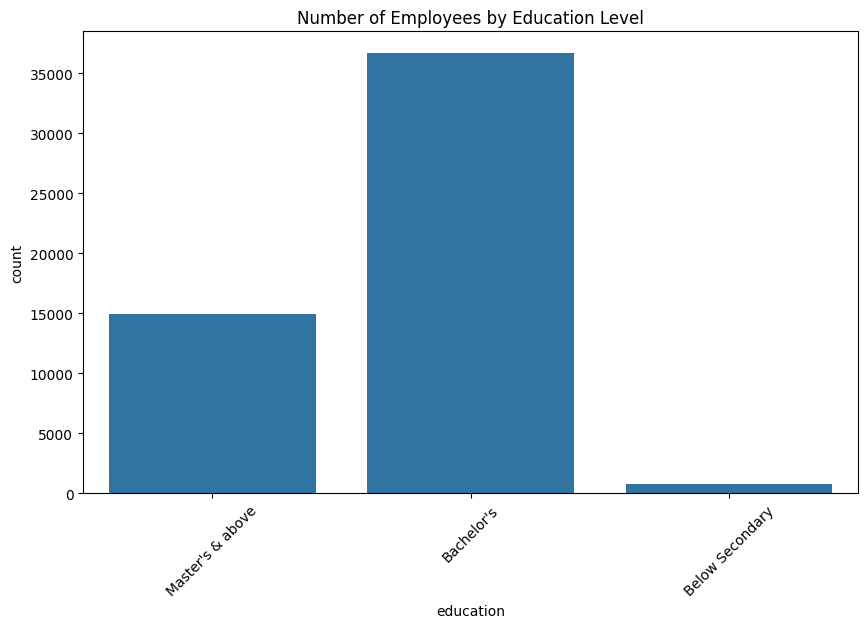

In [18]:
# 교육 수준별 직원 수
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='education')
plt.title('Number of Employees by Education Level')
plt.xticks(rotation=45)
plt.show()

- (5) Gender: 남성(m)과 여성(f) 두 개의 범주를 가진 범주형 변수. 회사의 남성 직원 수는 여성 직원 수의 약 두 배 정도

In [19]:
train_data.gender.value_counts()

gender
m    38496
f    16312
Name: count, dtype: int64

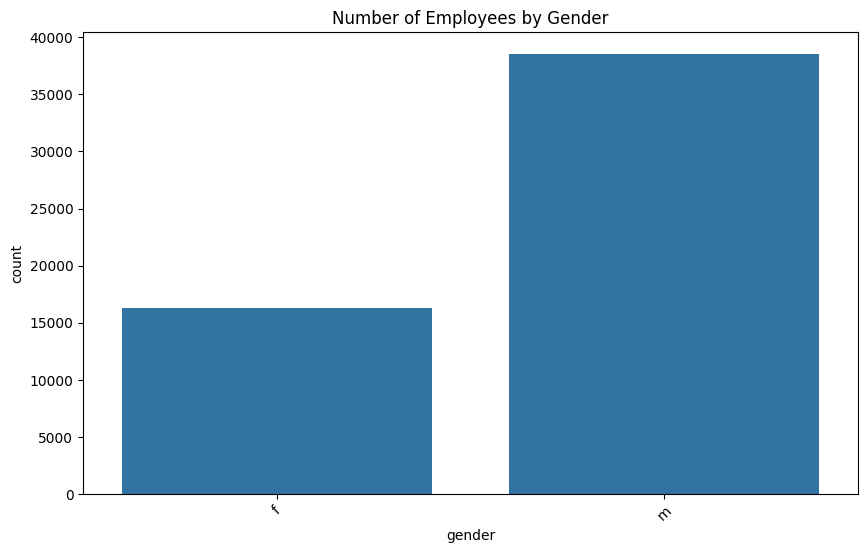

In [20]:
# 1. 직원들의 성별
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='gender')
plt.title('Number of Employees by Gender')
plt.xticks(rotation=45)
plt.show()

- (6) recruitment_channel: 직원의 채용 경로는 3개의 범주를 포함: sourcing, referred, other.

In [21]:
train_data.recruitment_channel.value_counts()

recruitment_channel
other       30446
sourcing    23220
referred     1142
Name: count, dtype: int64

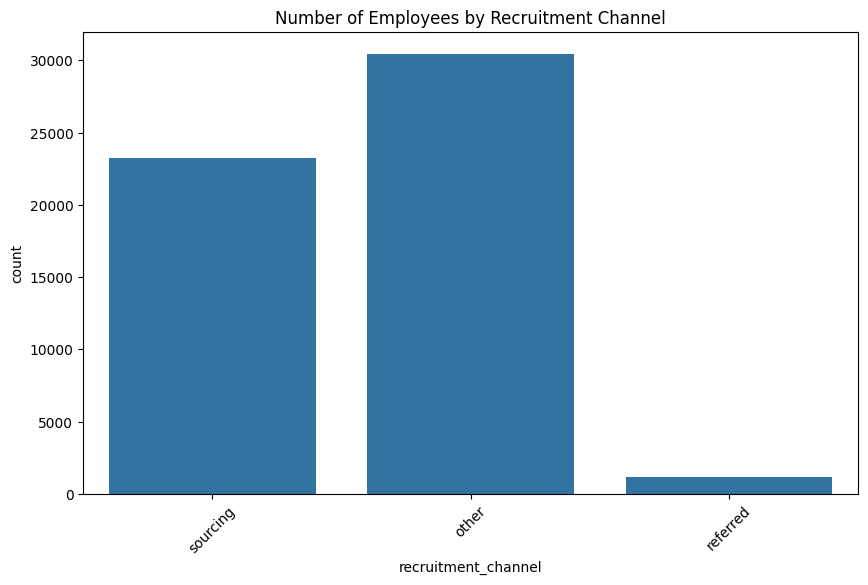

In [22]:
# 각 채용 경로별 직원 수
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='recruitment_channel')
plt.title('Number of Employees by Recruitment Channel')
plt.xticks(rotation=45)
plt.show()

- (7) no_of_trainings: 직원이 전년도에 완료한 기타 교육의 횟수. 모든 직원은 전년도에 최소한 한 번의 교육을 받았으며, 교육 횟수는 1회에서 10회까지 다양함

In [23]:
train_data.no_of_trainings.value_counts()

no_of_trainings
1     44378
2      7987
3      1776
4       468
5       128
6        44
7        12
8         5
10        5
9         5
Name: count, dtype: int64

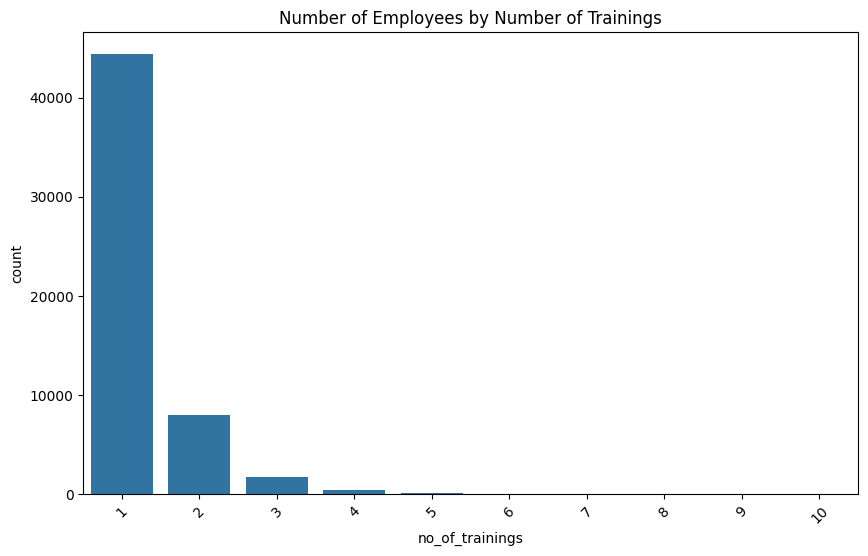

In [24]:
# 교육 횟수별 직원 수
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='no_of_trainings')
plt.title('Number of Employees by Number of Trainings')
plt.xticks(rotation=45)
plt.show()

- (8) age: 직원의 나이. 20살부터 60세까지 존재

In [25]:
print(train_data.age.min())
print(train_data.age.max())

20
60


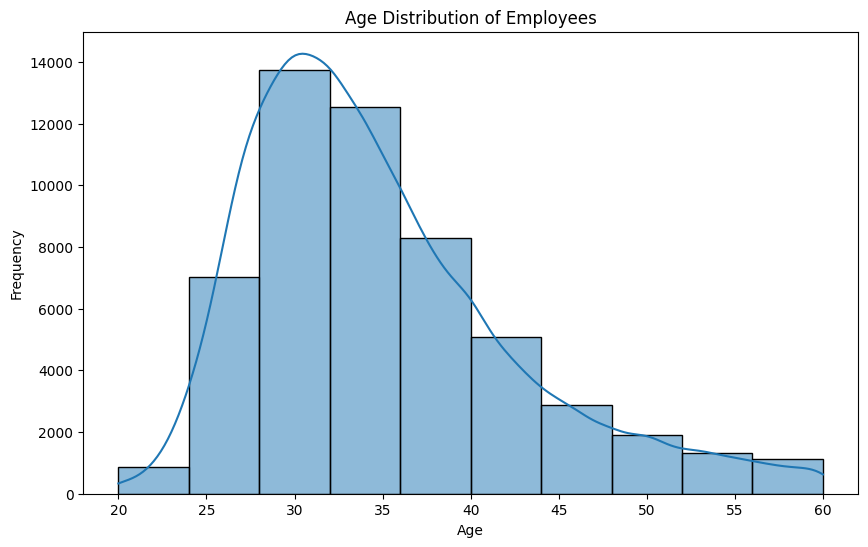

In [26]:
# 직원 나이 분포
plt.figure(figsize=(10, 6))
sns.histplot(data=train_data, x='age', bins=10, kde=True)
plt.title('Age Distribution of Employees')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

- (9) previous_year_rating: 전년도 직원 평가 점수. 이 변수는 1에서 5까지의 척도로 평가되기 때문에 범주형 변수

In [27]:
train_data.previous_year_rating.value_counts()

previous_year_rating
3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: count, dtype: int64

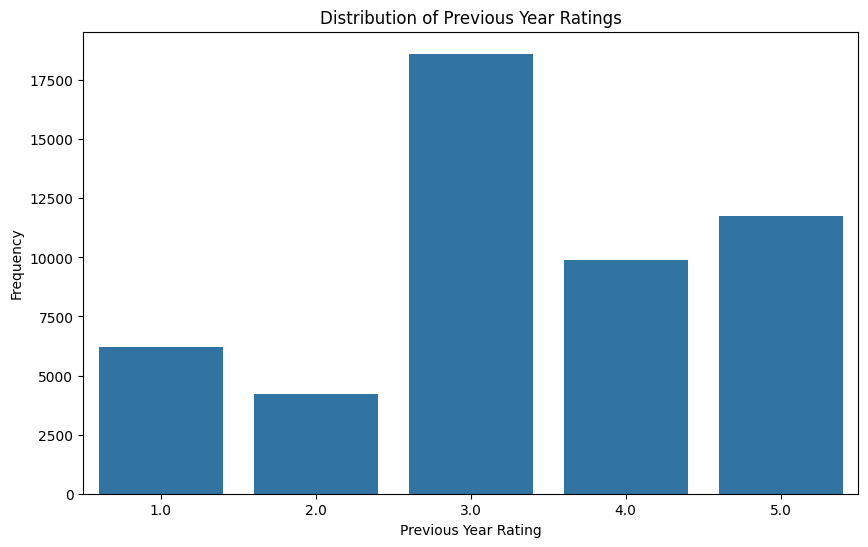

In [28]:
# 1. 이전 년도도 평가 점수 분포
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='previous_year_rating')
plt.title('Distribution of Previous Year Ratings')
plt.xlabel('Previous Year Rating')
plt.ylabel('Frequency')
plt.show()

- (10) length_of_service: 직원의 근속 연수. 최소 1년부터 37년까지 다양함

In [29]:
print(train_data.length_of_service.min())
print(train_data.length_of_service.max())

1
37


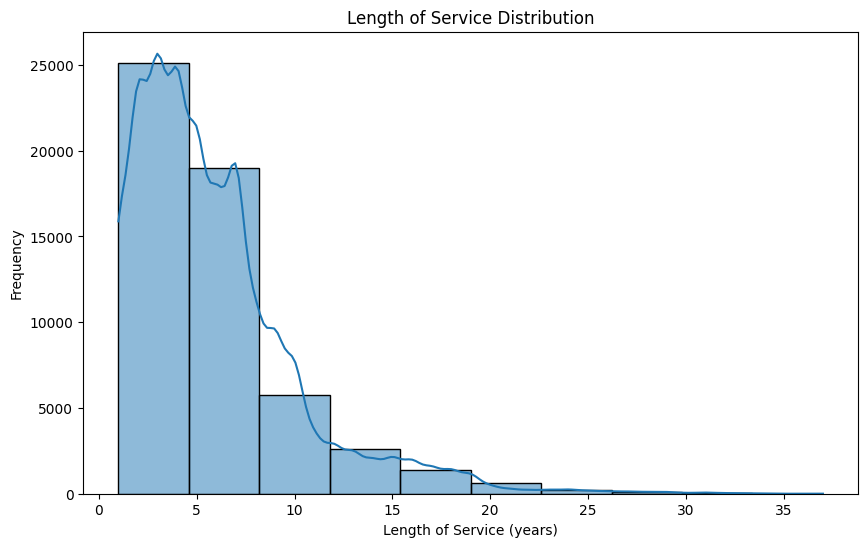

In [30]:
# 근속 연수 분포
plt.figure(figsize=(10, 6))
sns.histplot(data=train_data, x='length_of_service', bins=10, kde=True)
plt.title('Length of Service Distribution')
plt.xlabel('Length of Service (years)')
plt.ylabel('Frequency')
plt.show()

- (11) KPIs_met >80%: 이 변수는 80%보다 높은 주요 성과 지표(KPI)를 달성한 직원을 나타내는 범주형 변수. 1은 80% 이상의 KPI를 달성한 직원을, 0은 그렇지 않은 직원을 의미.

In [31]:
train_data['KPIs_met >80%'].value_counts()

KPIs_met >80%
0    35517
1    19291
Name: count, dtype: int64

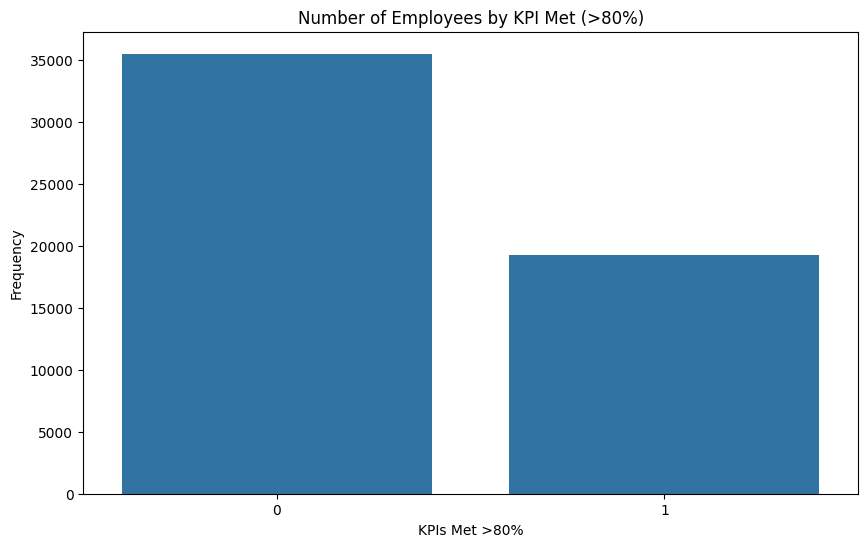

In [32]:
# 1. KPI 달성 여부에 따른 직원 수
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='KPIs_met >80%')
plt.title('Number of Employees by KPI Met (>80%)')
plt.xlabel('KPIs Met >80%')
plt.ylabel('Frequency')
plt.show()

- (12) awards_won?: 이 변수는 수상을 한 직원을 나타내는 범주형 변수. 1은 수상을 한 직원을, 0은 그렇지 않은 직원을 나타냄.

In [33]:
train_data['awards_won?'].value_counts()

awards_won?
0    53538
1     1270
Name: count, dtype: int64

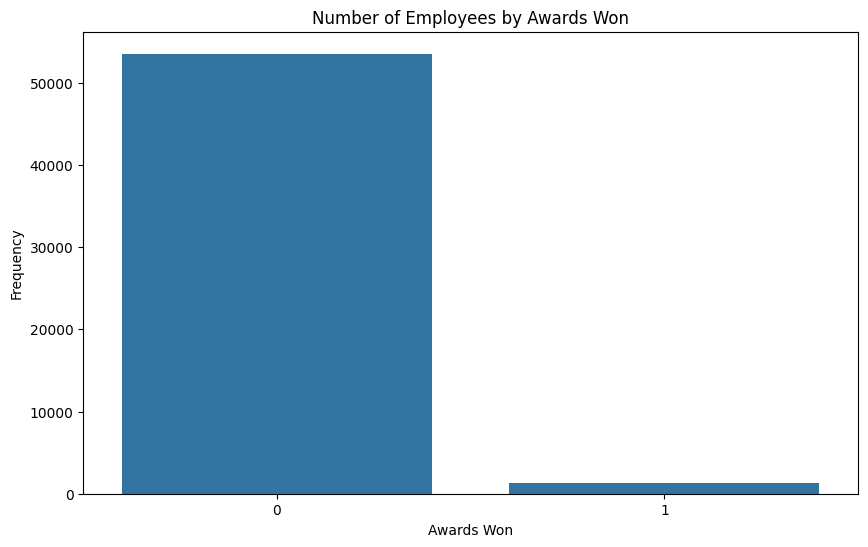

In [34]:
# 상을 수상한 여부에 따른 직원 수
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='awards_won?')
plt.title('Number of Employees by Awards Won')
plt.xlabel('Awards Won')
plt.ylabel('Frequency')
plt.show()

- (13) avg_training_score: 현재 training 평가에서의 평균 점수. 최소 39점부터 최대 99점까지 분포

In [35]:
print(train_data.avg_training_score.min())
print(train_data.avg_training_score.max())

39
99


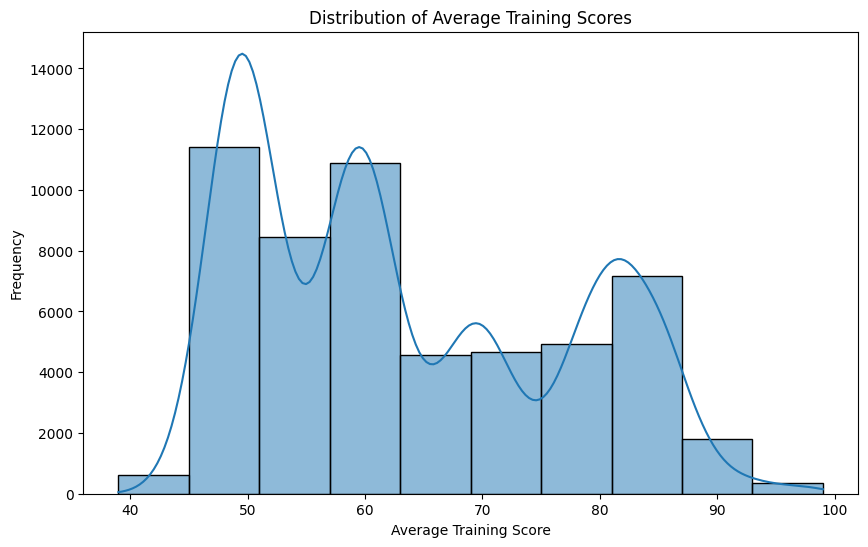

In [36]:
# 평균 교육 점수 분포 시각화
plt.figure(figsize=(10, 6))
sns.histplot(data=train_data, x='avg_training_score', bins=10, kde=True)
plt.title('Distribution of Average Training Scores')
plt.xlabel('Average Training Score')
plt.ylabel('Frequency')
plt.show()

- (14) is_promoted: 이 변수는 모든 위 파라미터들을 통해 직원의 승진 여부를 추천하는 목표 변수. 이는 이진 분류 문제로 다루어짐. 전체 직원 중 승진한 직원은 단 8.5%에 불과

In [37]:
train_data.is_promoted.value_counts()

is_promoted
0    50140
1     4668
Name: count, dtype: int64

([<matplotlib.axis.XTick at 0x19ba78d9d30>,
 [Text(0, 0, 'Not Promoted'), Text(1, 0, 'Promoted')])

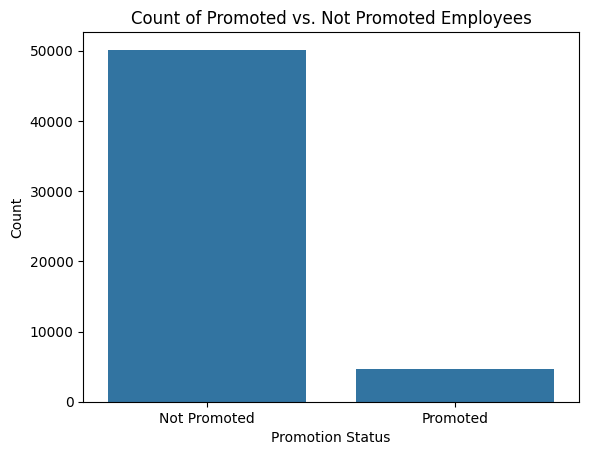

In [38]:
# is_promoted 시각화
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='is_promoted', data=train_data)
plt.xlabel('Promotion Status')
plt.ylabel('Count')
plt.title('Count of Promoted vs. Not Promoted Employees')
plt.xticks(ticks=[0, 1], labels=['Not Promoted', 'Promoted'])

##### EDA(Exploratory Data Analysis) 진행

목표 변수(is_promoted)는 다른 변수들과 유의미하게 상관 관계가 있지는 않음

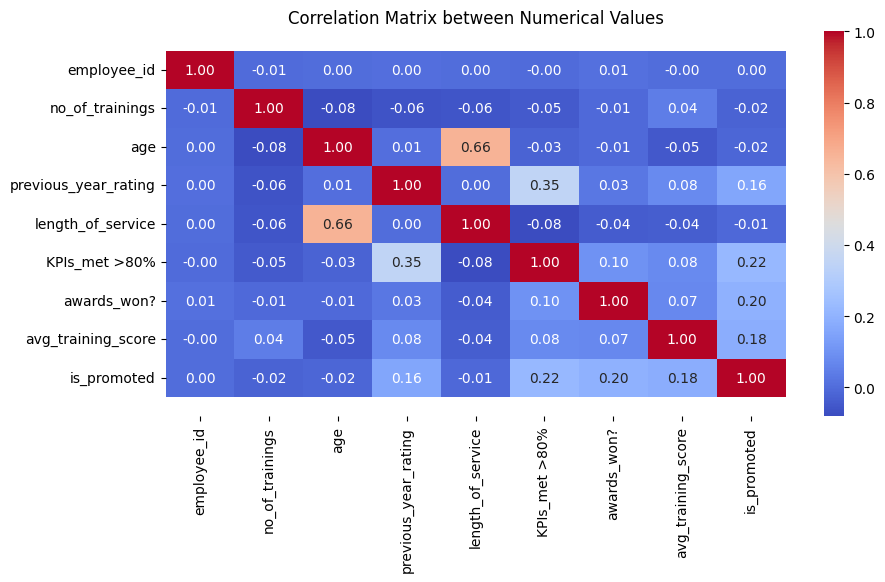

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# 숫자형 데이터만을 포함하는 데이터 프레임 생성
numeric_data = train_data.select_dtypes(include=['int64', 'float64'])

# correlation matrix 계산
cor = numeric_data.corr()

# 시각화
plt.figure(figsize=(10, 5))
ax = sns.heatmap(cor, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size': 10})
bottom, top = plt.gca().get_ylim()
plt.gca().set_ylim(bottom + 0.5, top - 0.5)  # 현재 축을 가져와서 설정
plt.title('Correlation Matrix between Numerical Values')
plt.show()

2. 본인의 Insight 설정, 검증 및 시각화

<가설 1> - 부서에 사람이 많을수록, 대체적으로 승진한 사람의 숫자도 많을 것이다.

- 각 부서에서 승진 여부에 따라 직원 수를 그룹화하여 막대 그래프로 나타내기

##### 각 막대의 높이:
각 부서에서 승진된 직원의 수와 승진되지 않은 직원의 수를 나타냄.
막대의 높이가 높을수록 해당 부서에서 많은 직원들이 승진한 것을 의미함
##### 부서 간 비교:
막대들을 비교하여 각 부서에서의 승진 비율을 알 수 있음.
예를 들어, 어떤 부서의 막대가 더 높으면 해당 부서에서 승진이 활발하게 일어났음을 나타냄

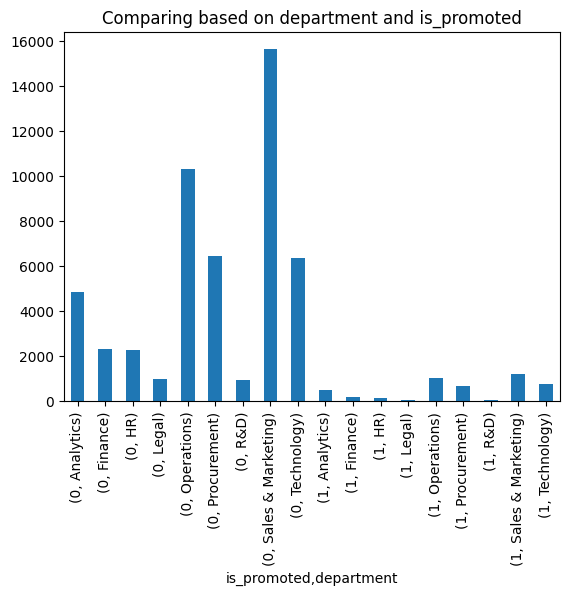

In [40]:
# 부서별 승진 여부에 대한 막대 그래프
train_data.groupby(['is_promoted','department'])['employee_id'].count().plot(kind = 'bar')
plt.title('Comparing based on department and is_promoted')
plt.show()

##### 각 부서의 백분율:
각 부서별로 승진된 직원 수를 전체 승진된 직원 수로 나눈 후 100을 곱하여 백분율로 표현함.
예를 들어, Sales 부서의 백분율이 20%라면 Sales 부서가 전체 승진된 직원 중 20%를 차지한다는 의미

In [41]:
# 각 부서별로 승진된 직원의 백분율을 계산
# 승진된 직원(is_promoted == 1)만을 필터링하여 부서별로 그룹화하고 직원 수를 세고, 전체 승진된 직원 수로 나누어 백분율을 계산
d = train_data[train_data['is_promoted'] == 1].groupby('department').count()['employee_id']
print((d / d.sum()) * 100)

department
Analytics            10.968295
Finance               4.413025
HR                    2.913453
Legal                 1.135390
Operations           21.915167
Procurement          14.738646
R&D                   1.478149
Sales & Marketing    25.985433
Technology           16.452442
Name: employee_id, dtype: float64


<나의 insight 1> - 시각화 결과에 따르면, 
Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                   999
순서로 사람이 많았는데, 막대그래프를 통해 사람이 많은 Sales & Marketing, Operations 부서에 승진한 사람이 많았고, 백분율을 계산해봤을 때도 승진한 사람의 비율이 대체적으로 부서에 사람이 많은 순서대로 높았음

<나의 가설 2> - 학력이 높을수록, 대체적으로 승진한 사람의 숫자도 많을 것이다.

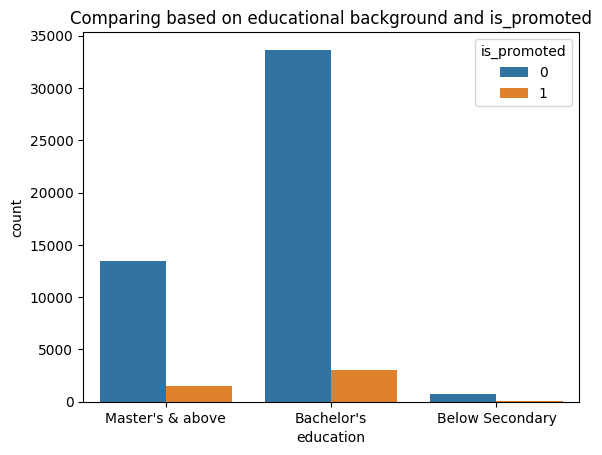

In [42]:
# 직원의 교육 수준이 승진에 영향을 미쳤는지 시각화
sns.countplot(x = 'education', hue = 'is_promoted', data = train_data)
plt.title('Comparing based on educational background and is_promoted')
plt.show()

In [43]:
# 학력(Below Secondary, Bachelor's, Master's & above)에 따라 승진된 직원의 백분율을 출력
train_data[train_data['is_promoted'] == 1]['education'].value_counts(normalize = True) * 100

education
Bachelor's          66.168060
Master's & above    32.358117
Below Secondary      1.473823
Name: proportion, dtype: float64

<나의 insight 2> - 시각화 결과에 따르면, Bachelor's 학위를 가진 직원들이 가장 많이 승진한 것으로 나타남. 이 그룹은 전체 승진된 직원 중 약 66.17%를 차지함.
Master's & above 학위를 가진 직원들 역시 상당한 비율로 승진되었음. 약 32.36%가 이 그룹에 해당함.
Below Secondary 학위를 가진 직원들은 매우 적은 비율로 승진되었음. 이 그룹은 전체 승진된 직원 중 약 1.47%를 차지함.

<나의 insight 2> - Bachelor's와 Master's & above 학위를 가진 직원들이 승진 비율이 높은 반면, Below Secondary 학위를 가진 직원들은 매우 낮은 승진 비율을 보였음. 이는 일반적으로 높은 학력 수준이 승진 기회를 더 많이 받을 수 있음을 시사함. -> 가설 2의 주장을 일부 뒷받침한다고 볼 수 있음.
그러나, 가설 2에서의 예상과는 다르게, Bachelor's가 Master's & above 직원들에 비해 승진 비율이 높은 것은 아니기에, 학력이 높을수록 승진 비율이 가장 높았던 것은 아니었음으로 드러남

<나의 가설 3> - 남자일수록, 대체적으로 승진한 사람의 비율이 높을 것이다.

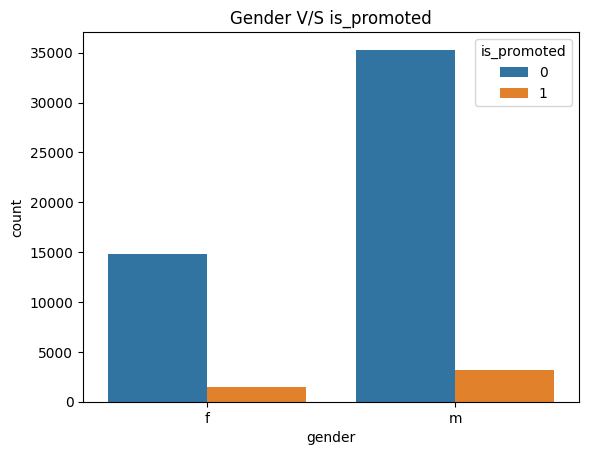

In [45]:
# 성별 대 승진 여부
# 성별과 승진 여부에 따른 countplot
sns.countplot(x = 'gender', hue = 'is_promoted', data = train_data)
plt.title('Gender V/S is_promoted')
plt.show()

In [47]:
# 승진된 여성과 남성의 백분율 출력
train_data[train_data['is_promoted'] == 1]['gender'].value_counts(normalize = True) * 100

gender
m    68.573265
f    31.426735
Name: proportion, dtype: float64

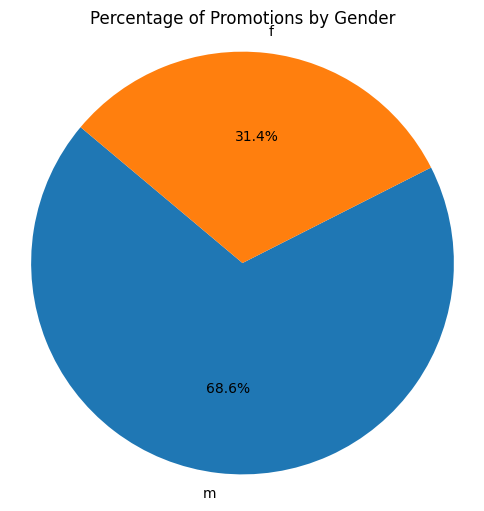

In [48]:
# 승진된 직원 중 여성과 남성의 비율 계산
promoted_gender_counts = train_data[train_data['is_promoted'] == 1]['gender'].value_counts(normalize=True) * 100

# 파이 차트 생성
plt.figure(figsize=(6, 6))
plt.pie(promoted_gender_counts, labels=promoted_gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Promotions by Gender')
plt.axis('equal')
plt.show()

<나의 insight 3> - 시각화 결과에 따르면, 승진한 사람 중 남성인 직원들이 68.6%를 차지함.
승진한 사람 중 여성인 직원들이 약 31.4%에 해당함.
이는 가설 3(남자일수록 대체적으로 승진한 사람의 비율이 높을 것)을 뒷받침함

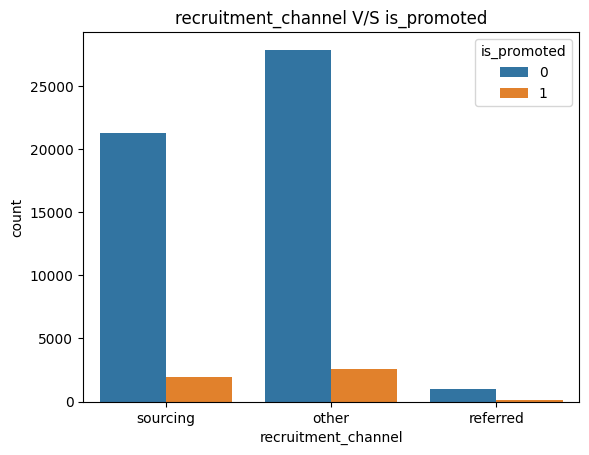

In [49]:
# recruitment_channel V/S is_promoted
# recruitment_channel과 승진 여부에 따른 countplot
sns.countplot(x = 'recruitment_channel', hue = 'is_promoted', data = train_data)
plt.title('recruitment_channel V/S is_promoted')
plt.show()

In [50]:
# 승진된 직원 중 각 recruitment_channel의 백분율 계산
promoted_channel_percentages = train_data[train_data['is_promoted'] == 1]['recruitment_channel'].value_counts(normalize = True)
promoted_channel_percentages

recruitment_channel
other       0.547558
sourcing    0.422879
referred    0.029563
Name: proportion, dtype: float64

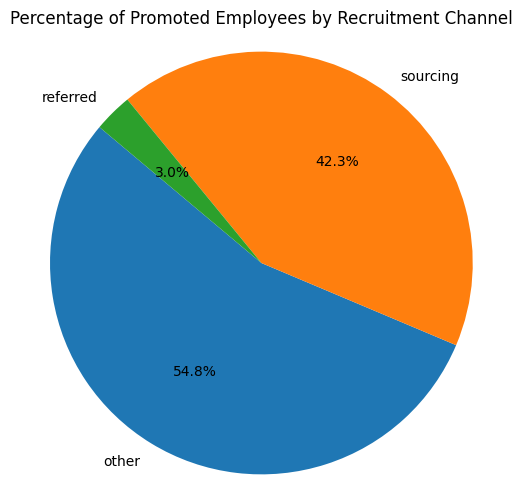

In [51]:
# 파이 차트 생성
plt.figure(figsize=(6, 6))
plt.pie(promoted_channel_percentages, labels=promoted_channel_percentages.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Promoted Employees by Recruitment Channel')
plt.axis('equal')
plt.show()

<나의 가설 4> - previous_year_rating을 기준으로 한 각 그룹에서, avg_training_score에서 높은 점수를 받은 직원이 승진했을 것이다.

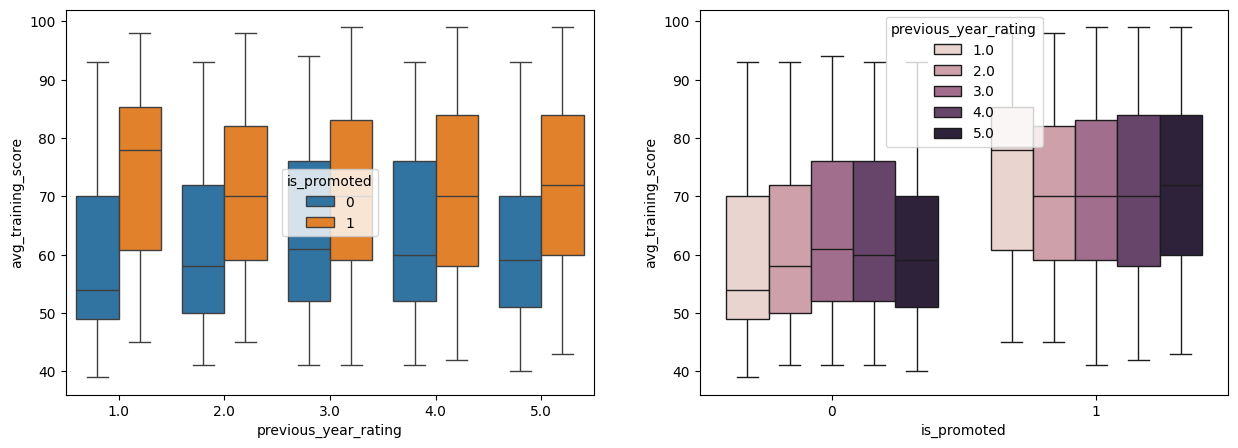

In [52]:
# 서브플롯 생성
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# 박스플롯
# previous_year_rating에 따른 avg_training_score의 분포
sns.boxplot(x='previous_year_rating', y='avg_training_score', data=train_data, hue='is_promoted', ax=axes[0])
# 승진 여부에 따른 avg_training_score의 분포
sns.boxplot(x='is_promoted', y='avg_training_score', data=train_data, hue='previous_year_rating', ax=axes[1])
plt.show()

<나의 insight 4> - 시각화 결과에 따르면, 평균 훈련 점수가 승진에 미치는 중요한 영향을 명확히 확인할 수 있음. 이전 연도 평가 등급이 가장 낮았던 직원들이 노력하여 훈련에서 더 높은 점수를 받았고, 이들이 가장 많이 승진한 직원들임. 즉, 성과가 전년도보다 향상된 직원들은 승진 기회에서 동등한 기회를 받고 있는 것으로 보임.

<나의 가설 5> - awards_won?(수상 여부)을 기준으로 봤을 때, 수상을 한 사람이 안 한 사람보다 승진했을 확률이 높을 것이다.

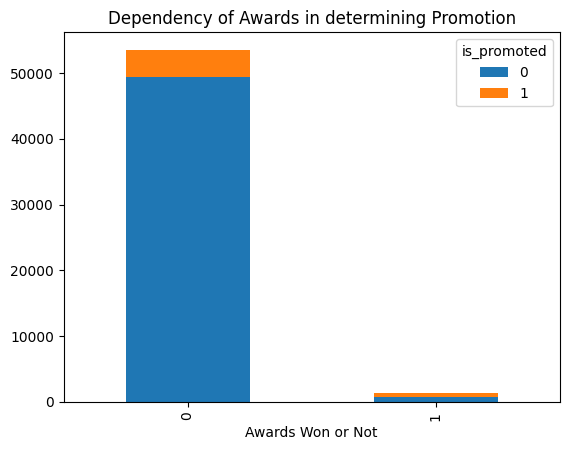

In [53]:
# 수상 여부가 승진에 영향을 미치는지 확인
# 교차 테이블(cross table) 생성
data = pd.crosstab(train_data['awards_won?'], train_data['is_promoted'])
data.plot(kind = 'bar', stacked = True)

plt.title('Dependency of Awards in determining Promotion')
plt.xlabel('Awards Won or Not')
plt.show()

In [54]:
# 승진된 직원 중 상을 수상한 직원의 백분율 출력
train_data[train_data['is_promoted'] == 1]['awards_won?'].value_counts(normalize = True) * 100

awards_won?
0    88.02485
1    11.97515
Name: proportion, dtype: float64

<나의 insight 5> - 시각화 결과에 따르면, 나의 가설 5와는 다르게 수상 여부가 승진에 중요한 영향을 미친다고는 볼 수 없음. 약 88%의 사람들이 수상하지 못했지만 승진했음. 즉, 꼭 수상하지 않더라도 승진 가능성이 존재함을 알 수 있음.

<나의 가설 6> - KPIs 달성 여부가 승진 결정에 영향을 미쳤을 것이다.

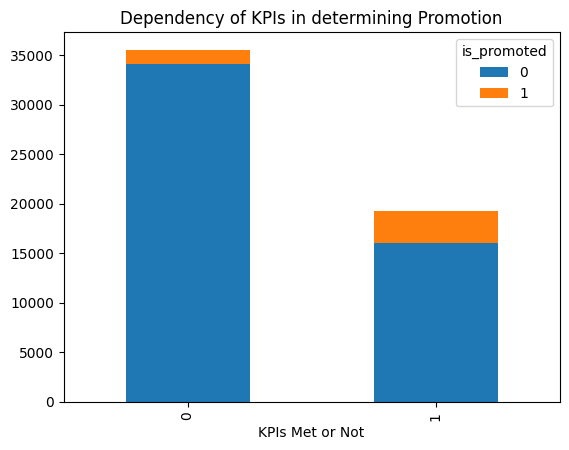

In [55]:
# # KPIs와 승진 간의 관련성 확인하기
# 교차 테이블 생성
data = pd.crosstab(train_data['KPIs_met >80%'], train_data['is_promoted'])
data.plot(kind = 'bar', stacked = True)

plt.title('Dependency of KPIs in determining Promotion')
plt.xlabel('KPIs Met or Not')
plt.show()

In [56]:
# 승진된 직원 중 KPIs를 달성한 비율 출력
promoted_with_kpis = train_data[train_data['is_promoted'] == 1]['KPIs_met >80%'].value_counts(normalize = True)
promoted_with_kpis

KPIs_met >80%
1    0.6988
0    0.3012
Name: proportion, dtype: float64

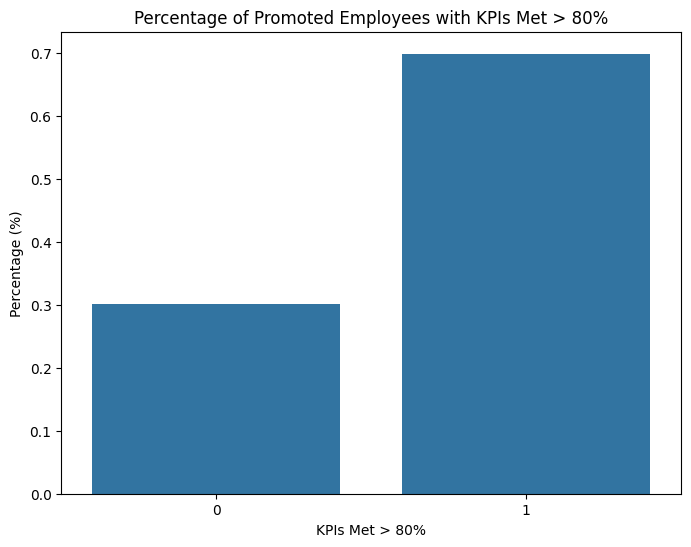

In [57]:
# 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x=promoted_with_kpis.index, y=promoted_with_kpis.values)
plt.title('Percentage of Promoted Employees with KPIs Met > 80%')
plt.xlabel('KPIs Met > 80%')
plt.ylabel('Percentage (%)')
plt.show()

<나의 insight 6> - 시각화 결과에 따르면, 승진한 사람들 중 좋은 KPI 점수를 가지고 있다면 승진할 가능성이 높아짐을 알 수 있음. 그러나, 좋은 KPI 점수를 가지고 있지 않더라도 승진한 사람들의 비율이 낮지 않기 때문에, 상관관계는 있으나 인과관계가 있다고 볼 수는 없음.(필수적인 것은 아닌 것으로 보임)

<나의 가설 7> - 특정 지역에서 승진을 한 사람이 많을 것이다.

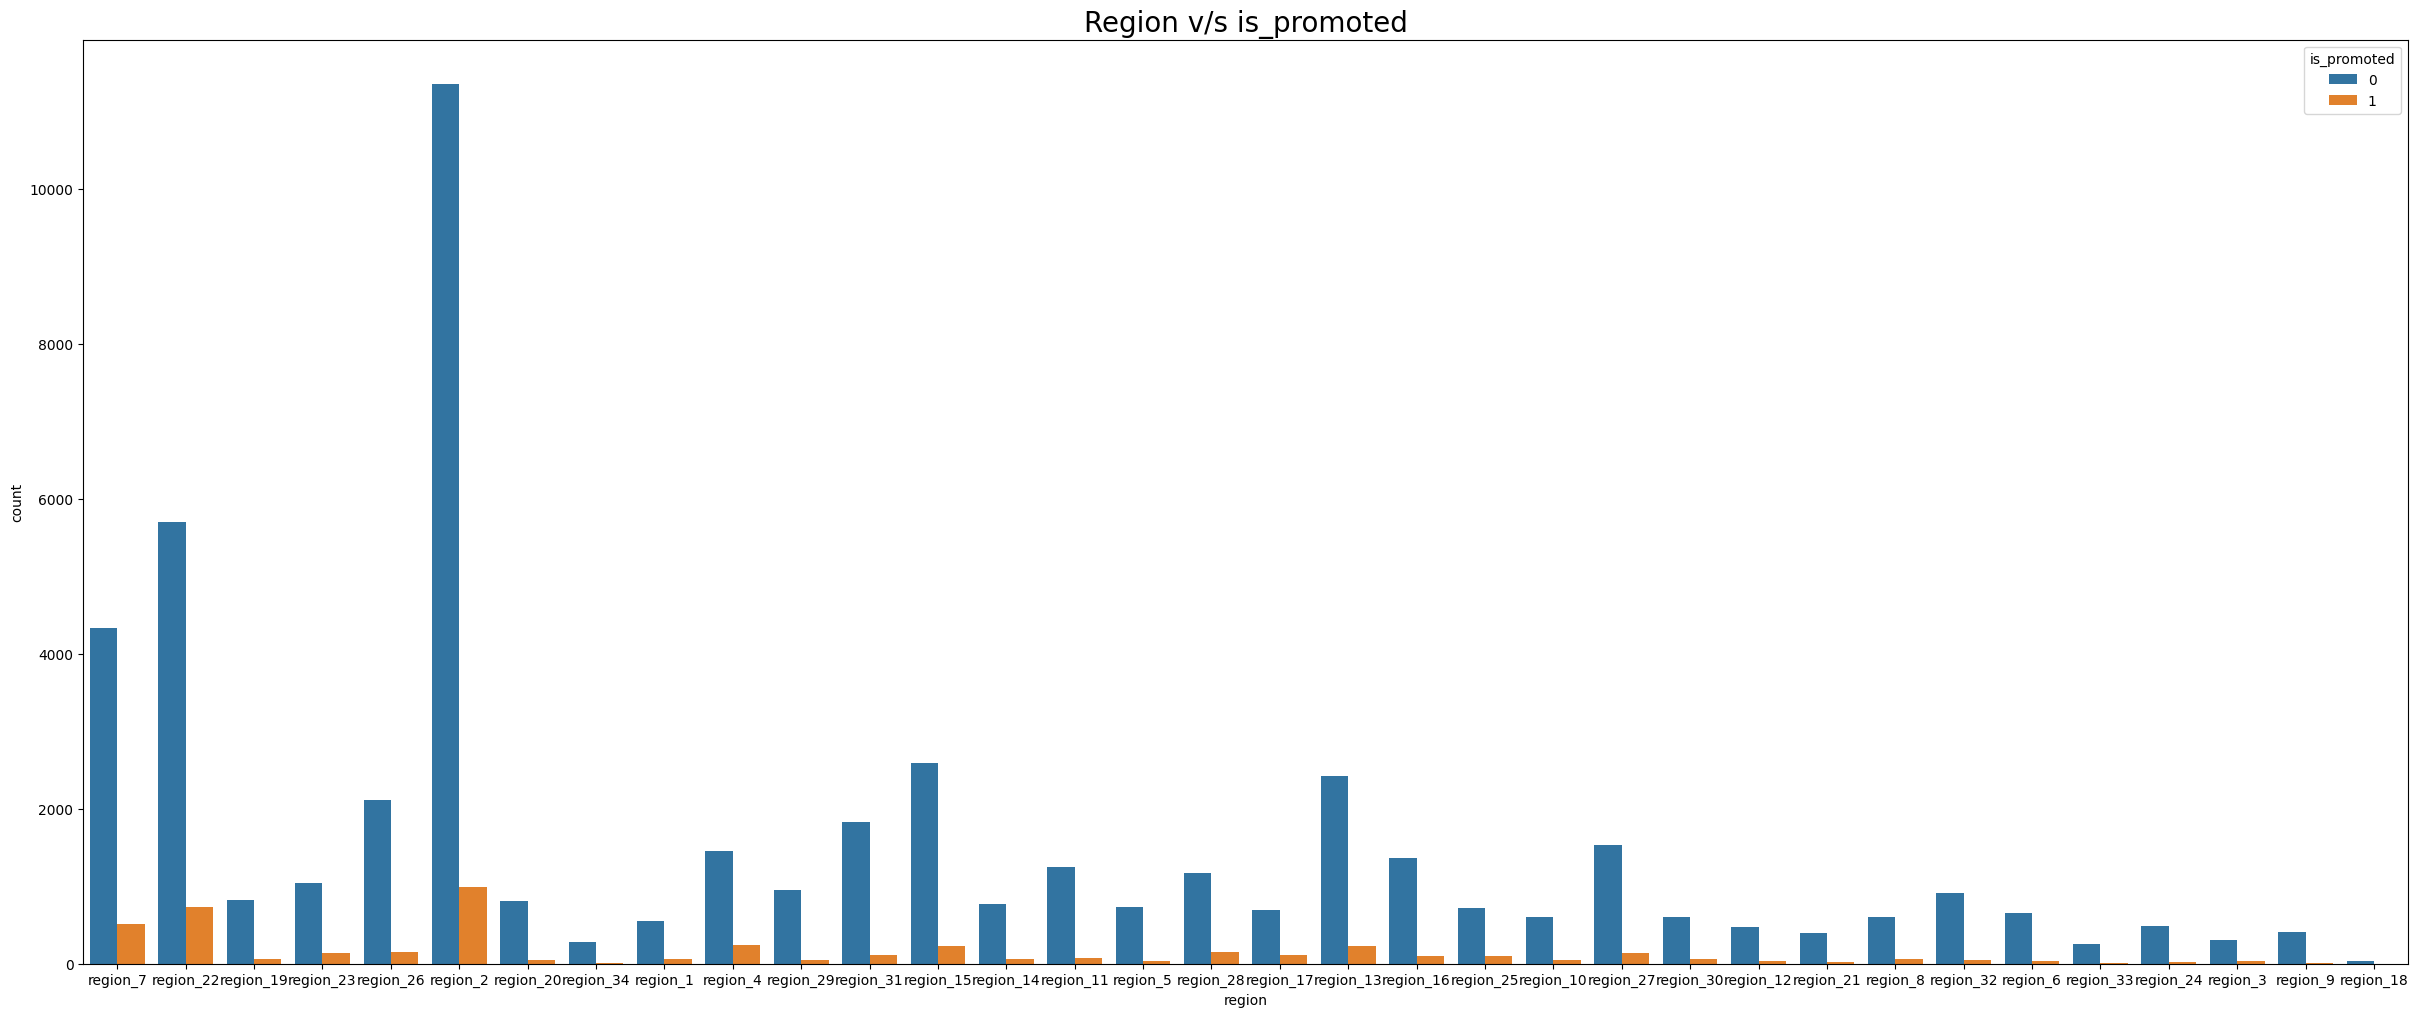

In [58]:
# 지역과 승진의 상관관계
plt.figure(figsize=(30,12))
sns.countplot(x='region',data=train_data,hue='is_promoted')
plt.title('Region v/s is_promoted',fontsize = 20)
plt.show()

<나의 insight 7> - 시각화 결과에 따르면, 지역 2와 22에서 가장 많은 직원들이 승진했음을 확인할 수 있음.

<나의 가설 8> - 교육 횟수가 많을수록 승진한 직원들이 많을 것이다.

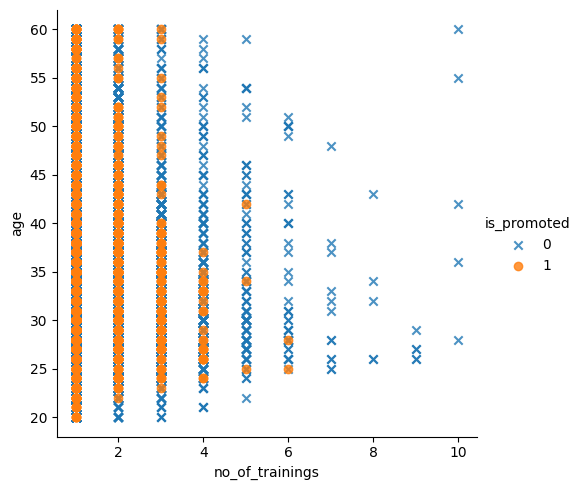

In [59]:
sns.lmplot(x='no_of_trainings',y='age',data=train_data,fit_reg=False,hue='is_promoted',markers=['x','o'])
plt.show()

<나의 insight 8> - 나의 가설 8과는 다르게, 교육 횟수와 승진된 직원 수는 반비례 관계에 있었다. 다양한 연령 그룹의 거의 모든 직원들이 약 3회의 교육을 받았다.

Data Preprocessing

In [60]:
# 데이터 준비를 위한 데이터 결합

# 테스트 세트에 'is_promoted' 열을 NaN으로 추가
test_data['is_promoted'] = np.nan

# train 데이터에 'data' 열 추가
train_data['data'] = 'train'

# test 데이터에 'data' 열 추가
test_data['data'] = 'test'

# test 데이터를 train 데이터와 동일한 열 순서로 재정렬
test_data = test_data[train_data.columns]

# train 데이터와 test 데이터를 합쳐서 combined 데이터 프레임 생성
combined_data = pd.concat([train_data, test_data], ignore_index=True)

# 결과 출력
combined_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,data
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0,train
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0,train
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0,train
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0,train
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0,train


In [61]:
# 결측치 값
combined_data.isna().sum()

employee_id                 0
department                  0
region                      0
education                3443
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     5936
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted             23490
data                        0
dtype: int64

In [62]:
combined_data.education.value_counts()

education
Bachelor's          52247
Master's & above    21429
Below Secondary      1179
Name: count, dtype: int64

In [63]:
#education(교육 수준)을 최빈값(mode)으로 채우기
combined_data['education'] = combined_data['education'].fillna("Bachelor's")

In [64]:
combined_data.education.value_counts()

education
Bachelor's          55690
Master's & above    21429
Below Secondary      1179
Name: count, dtype: int64

In [65]:
combined_data.education.isna().sum()

0

In [66]:
combined_data.previous_year_rating.value_counts()

previous_year_rating
3.0    26539
5.0    16838
4.0    14126
1.0     8903
2.0     5956
Name: count, dtype: int64

In [67]:
# previous_year_rating을 중앙값(median)으로 채우기
combined_data['previous_year_rating'] = combined_data['previous_year_rating'].fillna(combined_data['previous_year_rating'].median())

In [68]:
combined_data.previous_year_rating.value_counts()

previous_year_rating
3.0    32475
5.0    16838
4.0    14126
1.0     8903
2.0     5956
Name: count, dtype: int64

In [69]:
combined_data.isna().sum()

employee_id                 0
department                  0
region                      0
education                   0
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating        0
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted             23490
data                        0
dtype: int64

In [70]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78298 entries, 0 to 78297
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           78298 non-null  int64  
 1   department            78298 non-null  object 
 2   region                78298 non-null  object 
 3   education             78298 non-null  object 
 4   gender                78298 non-null  object 
 5   recruitment_channel   78298 non-null  object 
 6   no_of_trainings       78298 non-null  int64  
 7   age                   78298 non-null  int64  
 8   previous_year_rating  78298 non-null  float64
 9   length_of_service     78298 non-null  int64  
 10  KPIs_met >80%         78298 non-null  int64  
 11  awards_won?           78298 non-null  int64  
 12  avg_training_score    78298 non-null  int64  
 13  is_promoted           54808 non-null  float64
 14  data                  78298 non-null  object 
dtypes: float64(2), int6

In [71]:
combined_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,data
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0,train
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0,train
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0,train
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0,train
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0,train


Encoding the data

(cf) Feature Hashing은 기계 학습에서 특성(feature)을 다루는 기법 중 하나. 주로 많은 수의 범주형 특성이 있는 경우에 사용됨. Feature Hashing은 특성의 값을 해시 함수를 사용하여 고정된 크기의 벡터로 변환하는 방법

In [72]:
#Feature Hashing region
unique_region = np.unique(combined_data[['region']])
print("Total unique regions:", len(unique_region))
print(unique_region)

Total unique regions: 34
['region_1' 'region_10' 'region_11' 'region_12' 'region_13' 'region_14'
 'region_15' 'region_16' 'region_17' 'region_18' 'region_19' 'region_2'
 'region_20' 'region_21' 'region_22' 'region_23' 'region_24' 'region_25'
 'region_26' 'region_27' 'region_28' 'region_29' 'region_3' 'region_30'
 'region_31' 'region_32' 'region_33' 'region_34' 'region_4' 'region_5'
 'region_6' 'region_7' 'region_8' 'region_9']


In [73]:
from sklearn.feature_extraction import FeatureHasher
import pandas as pd

# 문자열을 리스트 형태로 변환
region_list = combined_data['region'].apply(lambda x: [x])

# FeatureHasher 인스턴스 생성
fh = FeatureHasher(n_features=6, input_type='string')

# fit_transform을 사용하여 해싱된 피처 생성
hashed_features = fh.fit_transform(region_list)

# 배열로 변환
hashed_features = hashed_features.toarray()

# DataFrame으로 변환
hashed_features = pd.DataFrame(hashed_features)

# 해싱된 특성 추가
combined_data = pd.concat((combined_data, hashed_features), axis=1)

In [74]:
combined_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,...,awards_won?,avg_training_score,is_promoted,data,0,1,2,3,4,5
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,...,0,49,0.0,train,0.0,-1.0,0.0,0.0,0.0,0.0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,...,0,60,0.0,train,0.0,0.0,-1.0,0.0,0.0,0.0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,...,0,50,0.0,train,0.0,0.0,0.0,1.0,0.0,0.0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,...,0,50,0.0,train,1.0,0.0,0.0,0.0,0.0,0.0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,...,0,73,0.0,train,0.0,-1.0,0.0,0.0,0.0,0.0


In [75]:
combined_data.drop('region',axis=1,inplace=True)

In [76]:
# 성별(gender)과 교육 수준(education) 인코딩
# 성별: f -> 0, m -> 1
# 교육 수준: Below Secondary: 0 Bachelor's: 1, Master's & above: 2
combined_data['gender'] = combined_data['gender'].map( {'f': 0, 'm': 1} ).astype(int)  
combined_data['education'] = combined_data['education'].map( {'Below Secondary': 0, 'Bachelor\'s': 1, 'Master\'s & above': 2} ).astype(int)

In [77]:
combined_data.head()

,employee_id,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,data,0,1,2,3,4,5
0,65438,Sales & Marketing,2,0,sourcing,1,35,5.0,8,1,0,49,0.0,train,0.0,-1.0,0.0,0.0,0.0,0.0
1,65141,Operations,1,1,other,1,30,5.0,4,0,0,60,0.0,train,0.0,0.0,-1.0,0.0,0.0,0.0
2,7513,Sales & Marketing,1,1,sourcing,1,34,3.0,7,0,0,50,0.0,train,0.0,0.0,0.0,1.0,0.0,0.0
3,2542,Sales & Marketing,1,1,other,2,39,1.0,10,0,0,50,0.0,train,1.0,0.0,0.0,0.0,0.0,0.0
4,48945,Technology,1,1,other,1,45,3.0,2,0,0,73,0.0,train,0.0,-1.0,0.0,0.0,0.0,0.0


In [78]:
# 빈도 인코딩(Frequency Encoding)

# 각 카테고리의 크기 계산
encoding = combined_data.groupby('department').size()

# 각 카테고리의 빈도 계산
encoding = encoding/len(combined_data)

# 'department'을 빈도로 매핑하여 인코딩 수행
combined_data['department'] = combined_data.department.map(encoding)

In [79]:
# 빈도 인코딩(Frequency Encoding)

# 각 카테고리의 크기 계산
encoding = combined_data.groupby('recruitment_channel').size()

# 각 카테고리의 빈도 계산
encoding = encoding/len(combined_data)

# 'recruitment_channe'을 빈도로 매핑하여 인코딩 수행
combined_data['recruitment_channel'] = combined_data.recruitment_channel.map(encoding)

In [80]:
combined_data.head()

,employee_id,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,data,0,1,2,3,4,5
0,65438,0.308501,2,0,0.423778,1,35,5.0,8,1,0,49,0.0,train,0.0,-1.0,0.0,0.0,0.0,0.0
1,65141,0.205778,1,1,0.555876,1,30,5.0,4,0,0,60,0.0,train,0.0,0.0,-1.0,0.0,0.0,0.0
2,7513,0.308501,1,1,0.423778,1,34,3.0,7,0,0,50,0.0,train,0.0,0.0,0.0,1.0,0.0,0.0
3,2542,0.308501,1,1,0.555876,2,39,1.0,10,0,0,50,0.0,train,1.0,0.0,0.0,0.0,0.0,0.0
4,48945,0.129620,1,1,0.555876,1,45,3.0,2,0,0,73,0.0,train,0.0,-1.0,0.0,0.0,0.0,0.0


In [81]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78298 entries, 0 to 78297
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           78298 non-null  int64  
 1   department            78298 non-null  float64
 2   education             78298 non-null  int32  
 3   gender                78298 non-null  int32  
 4   recruitment_channel   78298 non-null  float64
 5   no_of_trainings       78298 non-null  int64  
 6   age                   78298 non-null  int64  
 7   previous_year_rating  78298 non-null  float64
 8   length_of_service     78298 non-null  int64  
 9   KPIs_met >80%         78298 non-null  int64  
 10  awards_won?           78298 non-null  int64  
 11  avg_training_score    78298 non-null  int64  
 12  is_promoted           54808 non-null  float64
 13  data                  78298 non-null  object 
 14  0                     78298 non-null  float64
 15  1                  

In [82]:
# 'combined_data'의 'previous_year_rating' 열을 정수형(int)으로 변환하기
combined_data['previous_year_rating'] = combined_data['previous_year_rating'].astype(int)

In [83]:
combined_data.head()

,employee_id,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,data,0,1,2,3,4,5
0,65438,0.308501,2,0,0.423778,1,35,5,8,1,0,49,0.0,train,0.0,-1.0,0.0,0.0,0.0,0.0
1,65141,0.205778,1,1,0.555876,1,30,5,4,0,0,60,0.0,train,0.0,0.0,-1.0,0.0,0.0,0.0
2,7513,0.308501,1,1,0.423778,1,34,3,7,0,0,50,0.0,train,0.0,0.0,0.0,1.0,0.0,0.0
3,2542,0.308501,1,1,0.555876,2,39,1,10,0,0,50,0.0,train,1.0,0.0,0.0,0.0,0.0,0.0
4,48945,0.129620,1,1,0.555876,1,45,3,2,0,0,73,0.0,train,0.0,-1.0,0.0,0.0,0.0,0.0


In [84]:
# 주어진 대로 데이터를 다시 훈련 및 테스트 세트로 분리
import warnings
warnings.filterwarnings('ignore')

train_data = combined_data[combined_data['data']=='train']
train_data_copy = train_data.copy()
train_data.drop(['data','employee_id'],axis=1,inplace=True)

test_data = combined_data[combined_data['data']=='test']
submit = test_data['employee_id']
test_data_copy = test_data.copy()
test_data.drop(['is_promoted','data','employee_id'],axis=1,inplace=True)

del combined_data

In [85]:
print(train_data.shape)
print(test_data.shape)

(54808, 18)
(23490, 17)


In [86]:
train_data

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,0,1,2,3,4,5
0,0.308501,2,0,0.423778,1,35,5,8,1,0,49,0.0,0.0,-1.0,0.0,0.0,0.0,0.0
1,0.205778,1,1,0.555876,1,30,5,4,0,0,60,0.0,0.0,0.0,-1.0,0.0,0.0,0.0
2,0.308501,1,1,0.423778,1,34,3,7,0,0,50,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.308501,1,1,0.555876,2,39,1,10,0,0,50,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.129620,1,1,0.555876,1,45,3,2,0,0,73,0.0,0.0,-1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,0.129620,1,1,0.423778,1,48,3,17,0,0,78,0.0,0.0,1.0,0.0,0.0,0.0,0.0
54804,0.205778,2,0,0.555876,1,37,2,6,0,0,56,0.0,0.0,0.0,1.0,0.0,0.0,0.0
54805,0.097972,1,1,0.555876,1,27,5,3,1,0,79,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
54806,0.308501,1,1,0.423778,1,29,1,2,0,0,45,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [87]:
test_data_copy

,employee_id,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,data,0,1,2,3,4,5
54808,8724,0.129620,1,1,0.423778,1,24,3,1,1,0,77,NaN,test,0.0,-1.0,0.0,0.0,0.0,0.0
54809,74430,0.044739,1,0,0.555876,1,31,3,5,0,0,51,NaN,test,0.0,0.0,0.0,0.0,1.0,0.0
54810,72255,0.308501,1,1,0.555876,1,31,1,4,0,0,47,NaN,test,0.0,0.0,1.0,0.0,0.0,0.0
54811,38562,0.129735,1,0,0.555876,3,31,2,9,0,0,65,NaN,test,0.0,0.0,0.0,0.0,1.0,0.0
54812,64486,0.046323,1,1,0.423778,1,30,4,7,0,0,61,NaN,test,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78293,53478,0.018953,0,1,0.423778,1,24,3,1,0,0,61,NaN,test,0.0,0.0,0.0,0.0,1.0,0.0
78294,25600,0.129620,1,1,0.423778,1,31,3,7,0,0,74,NaN,test,0.0,0.0,0.0,0.0,0.0,1.0
78295,45409,0.044739,1,0,0.423778,1,26,4,4,0,0,50,NaN,test,0.0,0.0,0.0,0.0,0.0,1.0
78296,1186,0.129735,1,1,0.423778,3,27,3,1,0,0,70,NaN,test,1.0,0.0,0.0,0.0,0.0,0.0


In [88]:
test_data

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,0,1,2,3,4,5
54808,0.129620,1,1,0.423778,1,24,3,1,1,0,77,0.0,-1.0,0.0,0.0,0.0,0.0
54809,0.044739,1,0,0.555876,1,31,3,5,0,0,51,0.0,0.0,0.0,0.0,1.0,0.0
54810,0.308501,1,1,0.555876,1,31,1,4,0,0,47,0.0,0.0,1.0,0.0,0.0,0.0
54811,0.129735,1,0,0.555876,3,31,2,9,0,0,65,0.0,0.0,0.0,0.0,1.0,0.0
54812,0.046323,1,1,0.423778,1,30,4,7,0,0,61,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78293,0.018953,0,1,0.423778,1,24,3,1,0,0,61,0.0,0.0,0.0,0.0,1.0,0.0
78294,0.129620,1,1,0.423778,1,31,3,7,0,0,74,0.0,0.0,0.0,0.0,0.0,1.0
78295,0.044739,1,0,0.423778,1,26,4,4,0,0,50,0.0,0.0,0.0,0.0,0.0,1.0
78296,0.129735,1,1,0.423778,3,27,3,1,0,0,70,1.0,0.0,0.0,0.0,0.0,0.0


In [89]:
# submission용 데이터프레임 생성
submission = pd.DataFrame()

# employee_id 열을 submit 데이터로 설정
submission['employee_id'] = submit

# is_promoted 열을 NaN(결측값)으로 설정
submission['is_promoted'] = np.nan

In [90]:
submission

,employee_id,is_promoted
54808,8724,NaN
54809,74430,NaN
54810,72255,NaN
54811,38562,NaN
54812,64486,NaN
...,...,...
78293,53478,NaN
78294,25600,NaN
78295,45409,NaN
78296,1186,NaN


In [91]:
# 'is_promoted' 열을 정수형(int)으로 변환하여 다시 할당
train_data["is_promoted"] = train_data["is_promoted"].astype(int)

# 'is_promoted' 열을 y로 할당 (레이블)
y = train_data["is_promoted"]
# 'is_promoted' 열을 제외한 나머지 열들을 X로 할당 (특성)
X = train_data.drop(labels = ["is_promoted"],axis = 1)

In [93]:
# 모델의 Oversampling

print("Before OverSampling, counts of label '1': {}".format(sum(y == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y== 0)))

from imblearn.over_sampling import SMOTE
X_np = X.to_numpy()
y_np = y.to_numpy().ravel()

# SMOTE 인스턴스화
smote = SMOTE()

# 데이터 학습 및 리샘플링
x_sample, y_sample = smote.fit_resample(X_np, y_np)

# 리샘플링된 샘플 데이터 크기 확인
print("Size of x-sample :", x_sample.shape)
print("Size of y-sample :", y_sample.shape)

print("\nAfter OverSampling, counts of label '1': {}".format(sum(y_sample == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_sample == 0))) 

X = pd.DataFrame(x_sample,columns=X.columns)
y = pd.DataFrame(y_sample)

Before OverSampling, counts of label '1': 0
Before OverSampling, counts of label '0': 0 

Size of x-sample : (100280, 17)
Size of y-sample : (100280,)

After OverSampling, counts of label '1': 50140
After OverSampling, counts of label '0': 50140


In [94]:
# x와 y를 학습 및 테스트 세트로 분할하기
#모델 구축을 위한 학습-테스트 분할
from sklearn.model_selection import train_test_split
test_data_copy
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print("Shape of x_train: ", X_train.shape)
print("Shape of x_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of x_train:  (70196, 17)
Shape of x_test:  (30084, 17)
Shape of y_train:  (70196, 1)
Shape of y_test:  (30084, 1)


3. ML/DL Model에 대한 설명

Model Building

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , accuracy_score, roc_auc_score,roc_curve,classification_report,f1_score

1. Logistic Regression

Logistic Regression은 간단하면서도 직관적인 모델이다. 선형 결정 경계를 사용하여 클래스를 분류하기 때문에, 모델이 어떻게 예측을 수행하는지 이해하기 쉽다. 이는 모델의 결과를 해석하고 설명하는 데 유리해서 처음 모델로 사용하게 되었다.

In [96]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 열 이름을 제거하고 넘파이 배열로 변환
X_train_np = X_train.values
X_test_np = X_test.values

# Logistic Regression 모델 생성
lr = LogisticRegression(solver='liblinear', random_state=3)

# 모델 학습
lr.fit(X_train_np, y_train)

# 테스트 데이터로 예측
y_test_pred = lr.predict(X_test_np)

# 정확도 출력
print('Accuracy Score:', accuracy_score(y_test, y_test_pred))

Accuracy Score: 0.7625315782475734


In [97]:
f1_score(y_test, y_test_pred, zero_division=1)

0.7693996126533247

In [98]:
y_test_pred

array([1, 1, 1, ..., 0, 1, 0])

In [99]:
X_test

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,0,1,2,3,4,5
92988,0.129620,0.000000,1.000000,0.499821,1.0,23.424343,3.000000,1.575657,1.000000,0.000000,77.575657,0.0,0.000000,0.575657,0.0,0.424343,0.0
77138,0.130737,2.000000,0.013179,0.423778,1.0,39.013179,5.000000,6.986821,0.986821,0.000000,73.986821,0.0,0.000000,0.000000,0.0,1.000000,0.0
65836,0.308501,1.571043,1.000000,0.480443,1.0,31.428957,5.000000,5.000000,1.000000,0.000000,48.000000,0.0,0.000000,0.000000,0.0,1.000000,0.0
88329,0.129620,2.000000,0.622801,0.555876,1.0,37.000000,4.245603,10.000000,0.000000,0.622801,88.377199,0.0,-0.622801,0.000000,0.0,0.377199,0.0
85776,0.094832,1.000000,1.000000,0.423778,1.0,29.418437,2.418437,4.000000,0.581563,0.418437,70.418437,0.0,-0.418437,0.000000,0.0,0.581563,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46150,0.129735,2.000000,1.000000,0.423778,1.0,35.000000,1.000000,2.000000,0.000000,0.000000,62.000000,0.0,-1.000000,0.000000,0.0,0.000000,0.0
13171,0.129735,1.000000,1.000000,0.555876,1.0,31.000000,3.000000,2.000000,0.000000,1.000000,68.000000,0.0,1.000000,0.000000,0.0,0.000000,0.0
32936,0.046323,1.000000,0.000000,0.423778,1.0,30.000000,3.000000,4.000000,0.000000,0.000000,62.000000,0.0,-1.000000,0.000000,0.0,0.000000,0.0
98347,0.097972,1.000000,1.000000,0.423778,1.0,28.748553,5.000000,2.748553,1.000000,0.000000,86.000000,0.0,0.000000,0.251447,0.0,-0.748553,0.0


In [100]:
# 예측 결과를 새로운 데이터프레임에 저장
submission = pd.DataFrame()

# CSV 파일로 저장
submission.to_csv('sample_submission_logistic_regression.csv', index=False)

Decision Tree

Hyperparameter Tuning을 통해 최적의 하이퍼파라미터 조합을 찾아 모델의 예측 성능을 개선했다. Decision Tree는 각 변수의 중요도를 평가할 수 있는 장점이 있어, Feature 중요도 또한 확인했다.

Hyperparameter Tuning

In [101]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

dt = DecisionTreeClassifier()

X_no_columns = X.values

params = {'max_depth': sp_randint(2,12),
          'min_samples_split': sp_randint(2,12),
          'min_samples_leaf' : sp_randint(1,12)
          }

rsearch = RandomizedSearchCV(dt, param_distributions= params, n_iter=200 , 
                             cv = 3,scoring='roc_auc',random_state=3,n_jobs=-1,
                            return_train_score=True)

rsearch.fit(X_no_columns,y)

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000019BAA27A270>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000019BA99747A0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000019BA46BE0F0>},
                   random_state=3, return_train_score=True, scoring='roc_auc')

In [102]:
rsearch.best_params_

{'max_depth': 11, 'min_samples_leaf': 8, 'min_samples_split': 2}

In [103]:
# 열 이름을 제거한 데이터프레임 생성 (열 이름을 사용하지 않음)
X_train_no_columns = X_train.values
X_test_no_columns = X_test.values

# DecisionTreeClassifier 모델 생성 및 학습
dt = DecisionTreeClassifier(**rsearch.best_params_)
dt.fit(X_train_no_columns, y_train)

# 예측 및 성능 평가
y_train_pred = dt.predict(X_train_no_columns)

print("Train Accuracy:", accuracy_score(y_train, y_train_pred))

y_test_pred = dt.predict(X_test_no_columns)

print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

Train Accuracy: 0.8981138526411762
Test Accuracy: 0.8918694322563488


In [104]:
f1_score(y_test, y_test_pred, zero_division=1)

0.8820650400609071

In [105]:
# Feature 중요도
imp = pd.DataFrame(dt.feature_importances_,index=X.columns,columns=['importance'])
imp.sort_values(by='importance',ascending=False)

,importance
KPIs_met >80%,0.417258
avg_training_score,0.128206
department,0.117347
recruitment_channel,0.102937
awards_won?,0.064641
previous_year_rating,0.054080
gender,0.048732
1,0.027948
no_of_trainings,0.010475
4,0.008048


3. RANDOM FOREST

HR Analytics에서는 많은 변수(특성)들을 포함하는 데이터를 다루는 경우가 많다. Random Forest는 고차원 데이터에서도 잘 작동하며, 변수 간의 상호작용을 고려하여 복잡한 패턴을 탐지할 수 있는 모델이기에 사용해 보았다.

In [106]:
from sklearn.ensemble import RandomForestClassifier

# 열 이름을 제거한 데이터프레임 생성 (열 이름을 사용하지 않음)
X_train_no_columns = X_train.values
X_test_no_columns = X_test.values

# RandomForestClassifier 모델 생성 및 학습
rf = RandomForestClassifier()
rf.fit(X_train_no_columns, y_train)

# 예측 및 성능 평가
y_train_pred = rf.predict(X_train_no_columns)

print("Train Accuracy:", accuracy_score(y_train, y_train_pred))

y_test_pred = rf.predict(X_test_no_columns)

print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

Train Accuracy: 0.9998005584363782
Test Accuracy: 0.9645658821965164


In [107]:
f1_score(y_test, y_test_pred, zero_division=1)

0.9639962172385842

4. LightGBM

LightGBM은 Gradient Boosting Framework 중 하나로, 기존의 다른 트리 기반 모델보다 빠른 속도로 학습을 진행할 수 있는 장점이 있다. 특히 대규모 데이터셋이나 고차원 데이터에서도 높은 성능을 발휘하기에 사용했다.

In [108]:

import lightgbm as lgb

lgbc = lgb.LGBMClassifier(random_state=3)

lgbc.fit(X_train,y_train)

y_train_pred = lgbc.predict(X_train)

print(accuracy_score(y_train,y_train_pred))

y_test_pred = lgbc.predict(X_test)

print(accuracy_score(y_test,y_test_pred))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 34997, number of negative: 35199
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003085 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4326
[LightGBM] [Info] Number of data points in the train set: 70196, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498561 -> initscore=-0.005755
[LightGBM] [Info] Start training from score -0.005755
0.9656105761012024
0.9657957718388512


In [109]:
f1_score(y_test, y_test_pred, zero_division=1)

0.9649200559097263

5. XGBoost

XGBoost도 Gradient Boosting Framework 중 하나로, 다양한 데이터셋에서 높은 예측 성능을 보장한다. 특히 복잡한 데이터 구조와 대규모 데이터셋에서도 강력한 성능을 발휘하기 때문에 사용했다.

In [110]:
from xgboost.sklearn import XGBClassifier

xgb = XGBClassifier()

xgb.fit(X_train,y_train)

y_train_pred = xgb.predict(X_train)

print(accuracy_score(y_train,y_train_pred))

y_test_pred = xgb.predict(X_test)

print(accuracy_score(y_test,y_test_pred))

0.9700552738047752
0.9674245446084297


In [111]:
f1_score(y_test, y_test_pred, zero_division=1)

0.9666757344940152

In [112]:
# 예측 결과를 새로운 데이터프레임에 저장
submission_XGBoost = pd.DataFrame()

# CSV 파일로 저장
submission_XGBoost.to_csv('sample_submission_XGBoost.csv', index=False)

6. Catboost

Catboost는 Gradient Boosting Decision Tree(GBDT) 기반의 오픈 소스 머신 러닝 라이브러리이다. datahack 대회에서 1등한 사람이 사용했는데, 한 번도 써본 적이 없어 사용하게 되었다. CatBoost는 기본적으로 범주형 변수를 처리할 수 있는 능력이 뛰어나 HR Analytics에 사용하기에도 적합하다.

In [113]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier()

cat.fit(X_train,y_train)

y_train_pred = cat.predict(X_train)

print(accuracy_score(y_train,y_train_pred))

y_test_pred = cat.predict(X_test)

print(accuracy_score(y_test,y_test_pred))

Learning rate set to 0.063286
0:	learn: 0.6267786	total: 168ms	remaining: 2m 47s
1:	learn: 0.5829425	total: 182ms	remaining: 1m 30s
2:	learn: 0.5523306	total: 194ms	remaining: 1m 4s
3:	learn: 0.5201590	total: 205ms	remaining: 51.1s
4:	learn: 0.4737309	total: 217ms	remaining: 43.2s
5:	learn: 0.4464202	total: 231ms	remaining: 38.4s
6:	learn: 0.4263234	total: 243ms	remaining: 34.5s
7:	learn: 0.3980009	total: 256ms	remaining: 31.8s
8:	learn: 0.3849277	total: 270ms	remaining: 29.7s
9:	learn: 0.3717702	total: 283ms	remaining: 28.1s
10:	learn: 0.3621085	total: 296ms	remaining: 26.6s
11:	learn: 0.3466199	total: 309ms	remaining: 25.4s
12:	learn: 0.3360052	total: 322ms	remaining: 24.4s
13:	learn: 0.3216770	total: 334ms	remaining: 23.5s
14:	learn: 0.3075079	total: 348ms	remaining: 22.8s
15:	learn: 0.2949752	total: 358ms	remaining: 22s
16:	learn: 0.2818301	total: 370ms	remaining: 21.4s
17:	learn: 0.2710962	total: 382ms	remaining: 20.8s
18:	learn: 0.2624823	total: 393ms	remaining: 20.3s
19:	learn: 

In [223]:
f1_score(y_test, y_test_pred, zero_division=1)

0.9673233695652174

4. 차별화된 나의 방법 및 결론

##### (1) Data investigation & EDA
- EDA 분석을 진행하기 전에 Feature들을 조사하는 과정에서 하나하나 feature들이 무엇을 의미하고 어떤 역할을 할 것인지 분석하고, 시각화하며 어떤 인사이트들을 얻을 수 있을지 생각했습니다. 보통 data analysis를 진행할 때는 상관관계 분석을 진행하고 중요하다고 생각되는 feature들만 사용하지만, 저는 Feature 하나하나 다 살펴보며 결과에 어떤 영향을 미칠지 고민했습니다. 이는 나중에 EDA 분석을 할 때 다양한 가설 및 인사이트를 도출하는데 도움이 많이 되었고, 모든 특징을 분석한 건 저만의 차별화된 방법이라고 생각합니다.

##### (2) Feature Engineering
- 데이터에서 유의미한 특징을 추출하기 위해 다양한 Feature Engineering 기법을 적용했습니다. Correlation 분석을 사용해서 어떤 feature가 승진에 큰 영향을 미칠지 고려했습니다. 또한, 승진과의 상관관계만 확인하지 않고, 근속 연수와 성과 평가 점수의 상호작용을 고려했으며, 이를 통해 새로운 특성을 생성하고 모델의 성능을 개선하는 등 다양한 시도와 성능 개선을 수행했습니다.

##### (3) 다양한 ML/DL 모델 사용
- 프로젝트를 진행하며 Logistic Regression, Decision Tree, Random Forest, LightGBM과 같은 다양한 모델을 실험적으로 적용하고 비교했습니다. 각 모델의 강점과 약점을 고려하여, 문제의 복잡도와 데이터의 특성에 맞는 최적의 모델이 무엇일지 고민하며 수행하여 좋은 성능을 이끌어내고자 했습니다.

5. 본 과제를 통해 느낀점 기술
- (1) 데이터의 중요성과 전처리의 필수성
HR Analytics는 데이터의 질과 양에 따라 결과가 크게 달라질 수 있는 분야인 것 같습니다. 전처리를 잘못하거나 모델 튜닝을 어떻게 하느냐에 따라 성능 차이가 많이 났습니다. 또한 처음부터 데이터 품질을 높이기 위해 다양한 전처리 기법을 적용하는 것이 중요했습니다. 특히, 결측치 처리와 데이터 스케일링 등의 기법을 통해 모델 성능을 개선하는 과정에서 많은 것을 배웠습니다.
- (2) 인사이트 도출과 시각화: 데이터 분석을 통해 인사이트를 도출하고 이를 시각화하는 과정에서 어떤 데이터들이 중요한지 고민하는 게 도움이 많이 되었습니다. 특히, Heatmap, Bar plot 등의 시각화 기법을 통해 데이터의 패턴과 경향성을 명확히 전달하는 방법을 익혀서 도움이 많이 되었습니다.
- (3) 모델링과 평가: 다양한 머신러닝 모델을 적용하고, 이들을 비교하며 모델링 과정에서 최적의 모델이 무엇일지 고민하면서 많은 것들을 배웠습니다. 모델 평가 지표를 통해 모델의 성능을 정량적으로 평가하고, 이를 비즈니스 결정에 활용할 수 있도록 하는 과정이 도움이 많이 되었습니다.
- 이 프로젝트를 통해 데이터 분석과 머신러닝/딥러닝의 전반적인 프로세스와 그 중요성을 깊이 이해할 수 있었고, 비즈니스 문제를 해결하는 데 경험을 갖추게 되어 다른 대회들에도 도전해봐야겠다는 생각이 들었습니다.